# Classification of Handwritten Digits

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split as tts
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
data = datasets.load_digits()
x = data.images
y = data.target

In [7]:
# Split the data into training and testing sets
x = x.reshape(x.shape[0], 8, 8, 1)
x = x.astype('float32')/255
y = to_categorical(y)


In [8]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2)

In [10]:
# Create the model 
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (8, 8, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [19]:
# Define early stopping and model checkpoint
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
best_weights = ModelCheckpoint('best_model.h5', save_best_only = True, monitor = 'val_loss', mode = 'min')

In [20]:
# Fit the model
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test,y_test), callbacks = [early_stop,best_weights])

Epoch 1/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0860 - accuracy: 0.9763 - val_loss: 0.0995 - val_accuracy: 0.9722
Epoch 2/50
45/45 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9791 - val_loss: 0.0959 - val_accuracy: 0.9750
Epoch 3/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9770 - val_loss: 0.0992 - val_accuracy: 0.9722
Epoch 4/50
45/45 [==============================] - 0s 11ms/step - loss: 0.0807 - accuracy: 0.9791 - val_loss: 0.1078 - val_accuracy: 0.9611
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9791 - val_loss: 0.1010 - val_accuracy: 0.9722
Epoch 6/50
45/45 [==============================] - 0s 10ms/step - loss: 0.0729 - accuracy: 0.9791 - val_loss: 0.0966 - val_accuracy: 0.9722
Epoch 7/50
45/45 [==============================] - 0s 9ms/step - loss: 0.0705 - accuracy: 0.9812 - val_loss: 0.0986 - val_accuracy: 0.9722
Epoch 8/50
45/45 

# Plotting

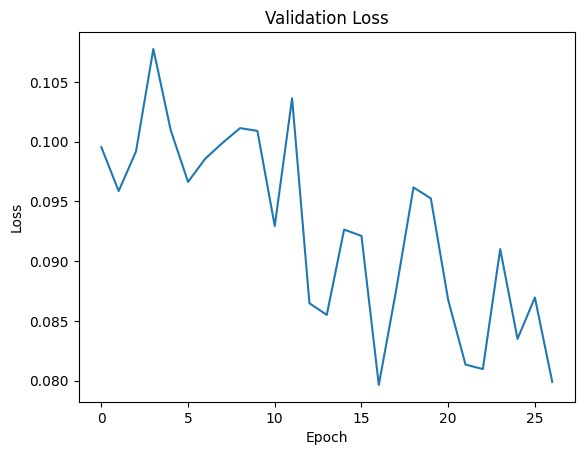

In [21]:
# Plot the loss
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

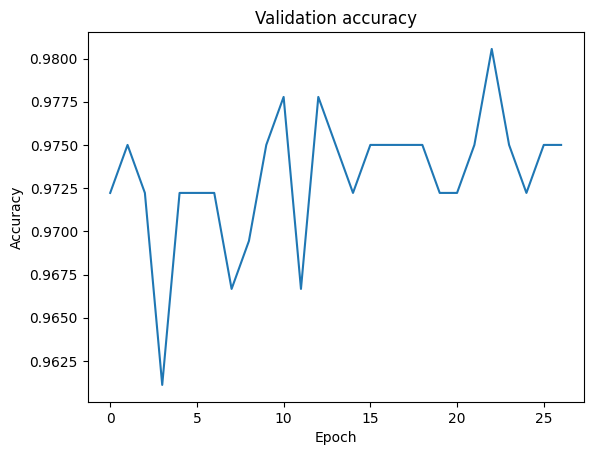

In [22]:
# Plot the accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [25]:
# Load the best weights
model.load_weights("best_model.h5")

In [26]:
# Evaluate the model
test_loss,test_acc = model.evaluate(x_test, y_test, verbose = 0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.07963334023952484
Test Accuracy: 0.9750000238418579
